In [33]:
!pip install citipy

In [34]:
import matplotlib.pyplot as plt
from citipy import citipy as cp
import pandas as pd

In [35]:
#Grab list of cities based on coordinates from citipy
citylist = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = cp.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
            #Get rid of duplicates
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'

print(len(citylist))

7957


In [36]:
print(citylist[0])

{'city': 'vaini', 'country': 'to', 'lat': -90, 'long': -180}


In [37]:
import requests as req
import json

In [38]:
#Create dataframe. Grab 500 random cities
citypd = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
})

citypd.head()

samplecity = citypd.sample(500)

In [39]:
samplecity

,city,country
680,carandai,br
4193,drexel heights,us
7893,svolvaer,no
5594,watertown,us
672,tres lagoas,br
7631,kadykchan,ru
1679,djambala,cg
1725,portel,br
7483,nizhniy kuranakh,ru
6830,yerofey pavlovich,ru


In [40]:
apikey = 'ac137d7cfe9e9ce34473bf6e5bf249f6'
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
samplecity['latitude'] = ""
samplecity['longitude'] = ""
samplecity['temperature'] = ""
samplecity['humidity'] = ""
samplecity['cloudiness'] = ""
samplecity['wind_speed'] = ""

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + apikey + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
#         print(cityweather)
        samplecity.set_value(index, "latitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "longitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "temperature", int(cityweather['main']['temp']))
        samplecity.set_value(index, "humidity", int(cityweather['main']['humidity']))
        samplecity.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        samplecity.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")


C:\Users\Vincent\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Vincent\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Vincent\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Vincent\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Vincent\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: set_value is deprecated and will be removed in a f

This is city#: 1
This is: carandai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=carandai
This is city#: 2
This is: drexel heights
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=drexel heights
This is city#: 3
This is: svolvaer
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=svolvaer
This is city#: 4
This is: watertown
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=watertown
No data for this city: tres lagoas
This is city#: 5
This is: tres lagoas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=tres lagoas
No data for this city: kadykchan
This is city#: 6
This is: kadykchan
This i

This is city#: 47
This is: semenyih
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=semenyih
This is city#: 48
This is: vila do maio
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=vila do maio
This is city#: 49
This is: columbus
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=columbus
This is city#: 50
This is: maceio
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=maceio
This is city#: 51
This is: lumberton
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=lumberton
This is city#: 52
This is: capitao poco
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid

This is city#: 93
This is: cootamundra
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=cootamundra
This is city#: 94
This is: rochelle
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=rochelle
This is city#: 95
This is: hauterive
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=hauterive
This is city#: 96
This is: mgandu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=mgandu
This is city#: 97
This is: jijiga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=jijiga
This is city#: 98
This is: hudson bay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7

This is city#: 139
This is: beian
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=beian
No data for this city: bolshaya chernigovka
This is city#: 140
This is: bolshaya chernigovka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=bolshaya chernigovka
No data for this city: alappuzha
This is city#: 141
This is: alappuzha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=alappuzha
This is city#: 142
This is: alofi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=alofi
This is city#: 143
This is: chibombo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=chibombo
This is city#: 144
This is: r

This is city#: 184
This is: yakeshi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=yakeshi
This is city#: 185
This is: altay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=altay
This is city#: 186
This is: youhao
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=youhao
This is city#: 187
This is: kolokani
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=kolokani
This is city#: 188
This is: north saint paul
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=north saint paul
This is city#: 189
This is: sakhnovshchyna
This is the requested URL: http://api.openweathermap.org/data/2.5/weather

This is city#: 230
This is: ekibastuz
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=ekibastuz
This is city#: 231
This is: jacksonville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=jacksonville
This is city#: 232
This is: porto velho
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=porto velho
This is city#: 233
This is: zaozerne
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=zaozerne
This is city#: 234
This is: karwar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=karwar
No data for this city: khorion
This is city#: 235
This is: khorion
This is the requested URL: http://api.ope

This is city#: 276
This is: kitimat
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=kitimat
No data for this city: loubomo
This is city#: 277
This is: loubomo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=loubomo
This is city#: 278
This is: serenje
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=serenje
This is city#: 279
This is: scottsbluff
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=scottsbluff
This is city#: 280
This is: methoni
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=methoni
This is city#: 281
This is: kazerun
This is the requested URL: http://api.openweathermap.or

This is city#: 321
This is: eenhana
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=eenhana
This is city#: 322
This is: normandin
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=normandin
This is city#: 323
This is: ruswil
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=ruswil
No data for this city: bolshiye klyuchishchi
This is city#: 324
This is: bolshiye klyuchishchi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=bolshiye klyuchishchi
No data for this city: tumannyy
This is city#: 325
This is: tumannyy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=tumannyy
No data for this city

This is city#: 367
This is: saint john
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=saint john
This is city#: 368
This is: gerede
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=gerede
This is city#: 369
This is: salina cruz
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=salina cruz
This is city#: 370
This is: save
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=save
This is city#: 371
This is: montes altos
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=montes altos
This is city#: 372
This is: mvuma
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=

This is city#: 414
This is: bocas del toro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=bocas del toro
This is city#: 415
This is: birnin kebbi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=birnin kebbi
This is city#: 416
This is: anjad
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=anjad
This is city#: 417
This is: ferrol
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=ferrol
This is city#: 418
This is: san pedro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=san pedro
This is city#: 419
This is: westerland
This is the requested URL: http://api.openweathermap.org/data/2.5/wea

This is city#: 461
This is: srirampur
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=srirampur
This is city#: 462
This is: mbengwi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=mbengwi
This is city#: 463
This is: banepa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=banepa
This is city#: 464
This is: libertad
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=libertad
This is city#: 465
This is: krasnovka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137d7cfe9e9ce34473bf6e5bf249f6&units=Imperial&q=krasnovka
This is city#: 466
This is: iraucuba
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=ac137

In [41]:
samplecity = samplecity[samplecity.latitude != ""]
samplecity

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
680,carandai,br,-20,-20,59,67,0,3
4193,drexel heights,us,32,32,99,2,1,12
7893,svolvaer,no,68,68,44,100,92,8
5594,watertown,us,44,44,82,42,1,8
1679,djambala,cg,-2,-2,69,93,0,2
1725,portel,br,38,38,53,87,0,8
7483,nizhniy kuranakh,ru,58,58,59,64,0,3
6830,yerofey pavlovich,ru,53,53,65,76,12,3
5658,shetpe,kz,44,44,63,53,92,8
5322,mountain home,us,43,43,67,37,20,20


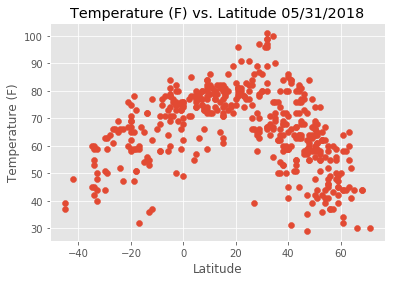

In [42]:
# import datetime
# date = datetime.date.today()
import time
date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(samplecity['latitude'],samplecity['temperature'])
plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")
plt.show()

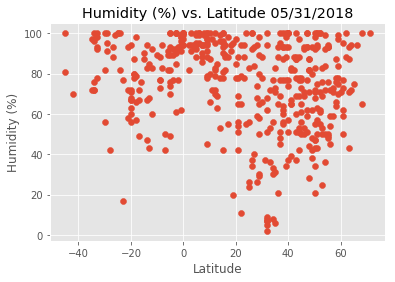

In [43]:
# plt.scatter(latitude,humidity)
plt.scatter(samplecity['latitude'], samplecity['humidity'])
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")
plt.show()

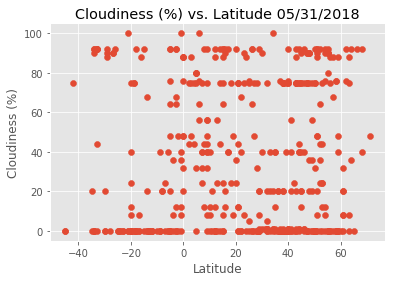

In [44]:
# plt.scatter(latitude,cloudy)
plt.scatter(samplecity['latitude'], samplecity['cloudiness'])
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness.png")
plt.show()

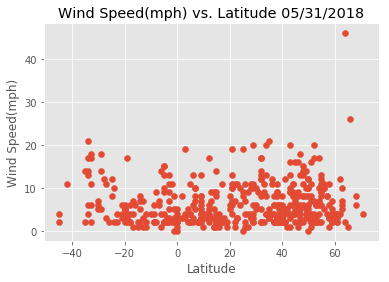

In [45]:
# plt.scatter(latitude,windspeed)
plt.scatter(samplecity['latitude'], samplecity['wind_speed'])
plt.title(f"Wind Speed(mph) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('ggplot')
plt.savefig("Wind_Speed.png")
plt.show()

In [46]:
# samplecity = samplecity[samplecity.latitude != ""]
#above works to remove blank answers
#Make into CSV
samplecity.to_csv("sampleweather.csv", encoding="utf-8", index=False)
df = pd.read_csv("sampleweather.csv")
df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,carandai,br,-20,-20,59,67,0,3
1,drexel heights,us,32,32,99,2,1,12
2,svolvaer,no,68,68,44,100,92,8
3,watertown,us,44,44,82,42,1,8
4,djambala,cg,-2,-2,69,93,0,2
